In [ ]:
! pip install --quiet llama-index llama-index-llms-openai openai chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 99.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Loading Data

[Loading Data](https://docs.llamaindex.ai/en/stable/module_guides/loading/loading.html)


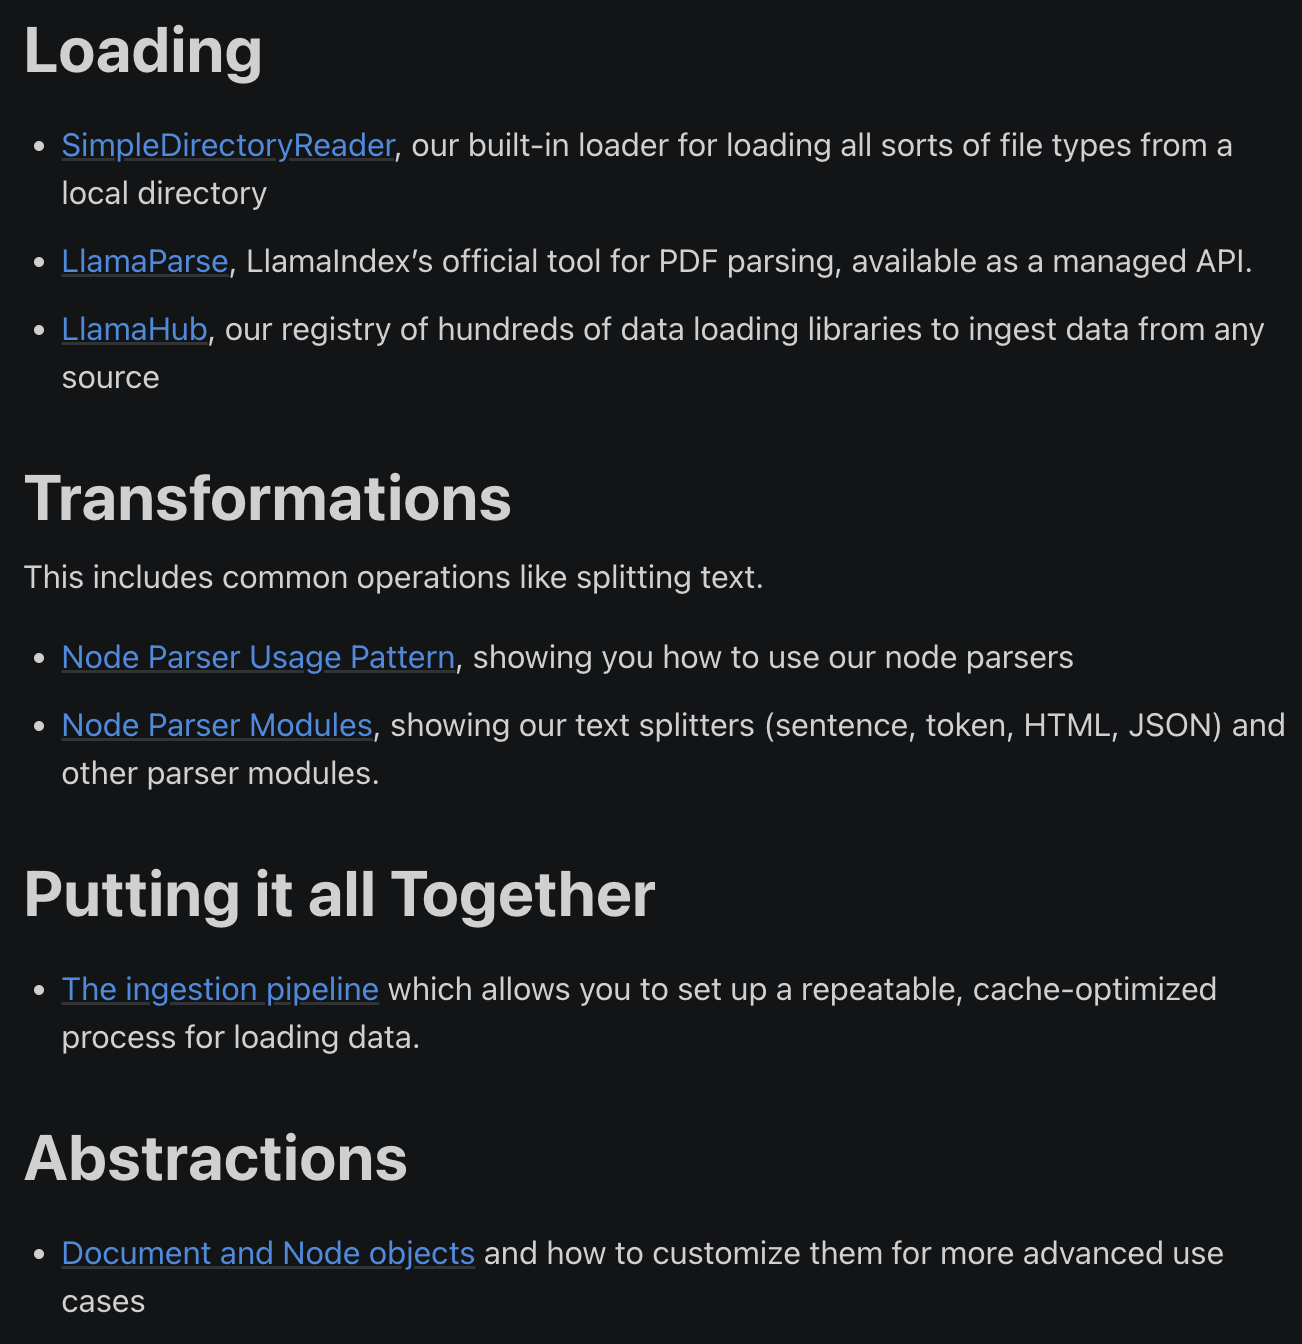

# SimpleDirectoryReader

[SimpleDirectoryReader](https://docs.llamaindex.ai/en/stable/module_guides/loading/simpledirectoryreader.html)


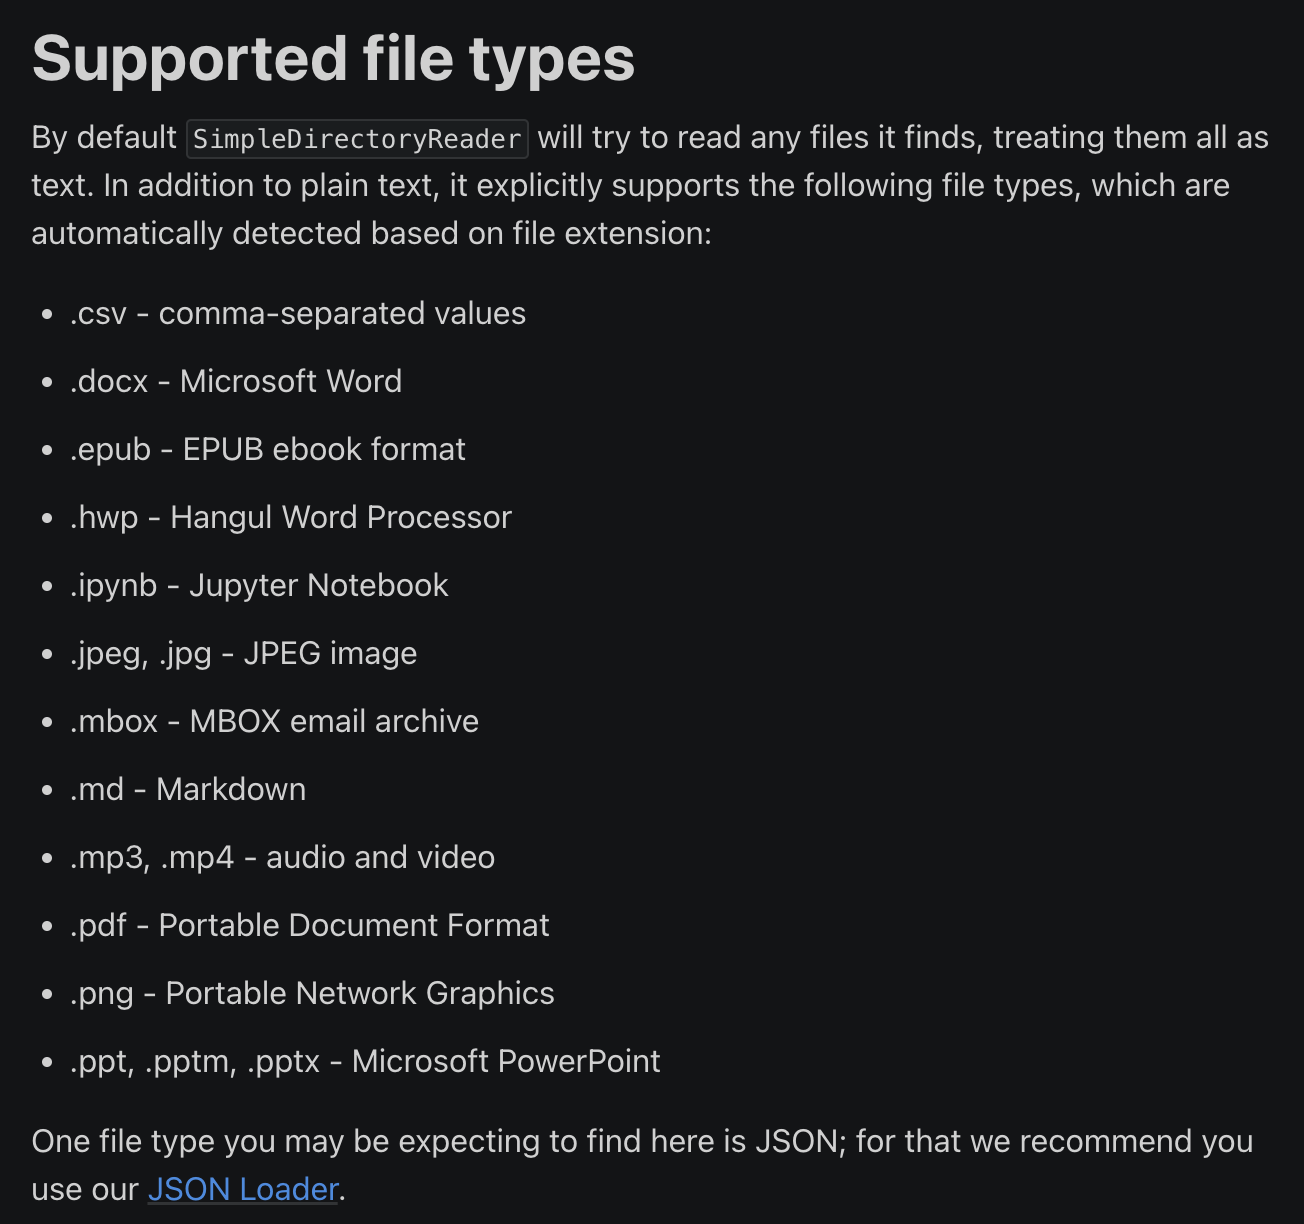

# Indexing

[Indexing](https://docs.llamaindex.ai/en/stable/understanding/indexing/indexing.html)


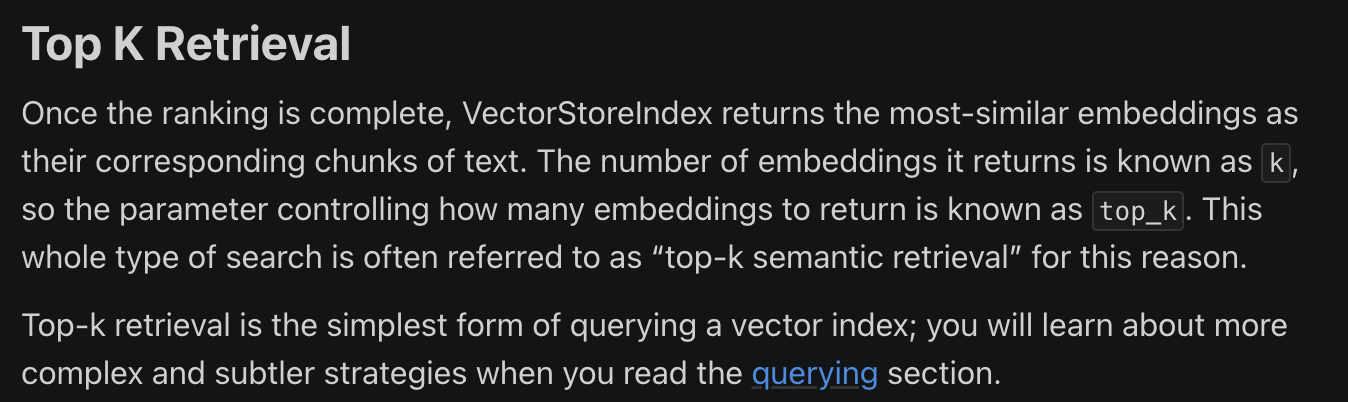

# Querying

[Querying](https://docs.llamaindex.ai/en/stable/understanding/querying/querying.html)

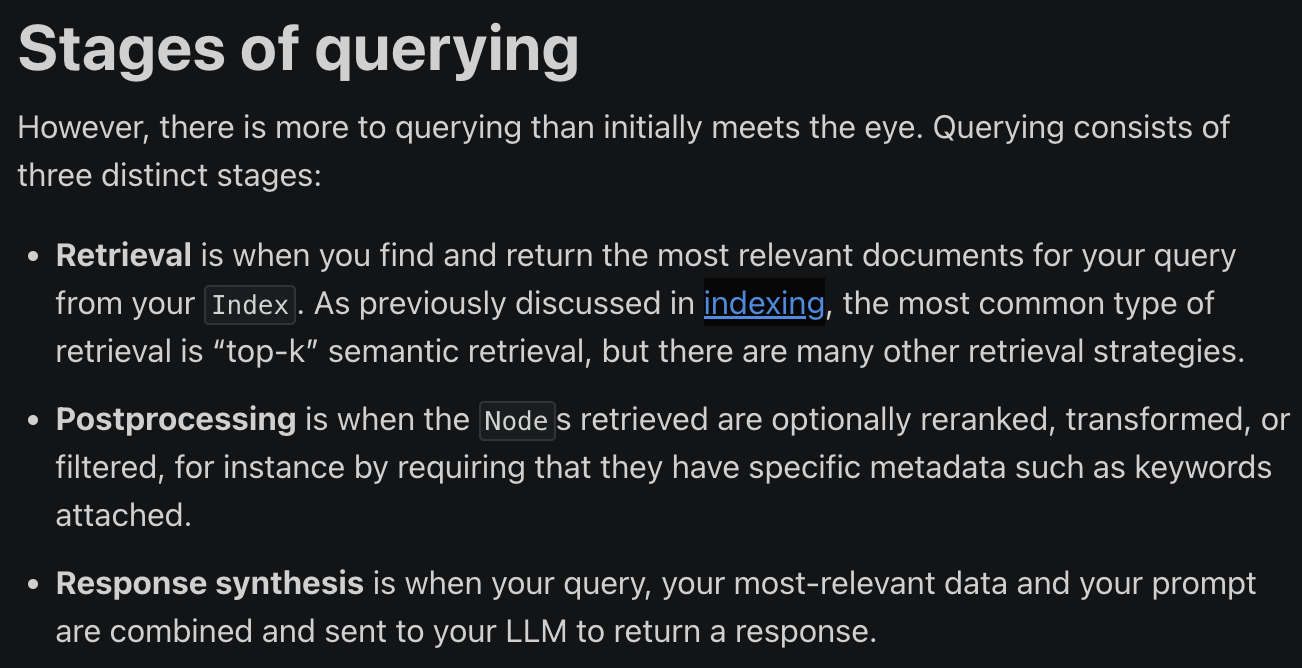

# Creating Documents

[Defining and Customizing Documents](https://docs.llamaindex.ai/en/stable/module_guides/loading/documents_and_nodes/usage_documents.html)


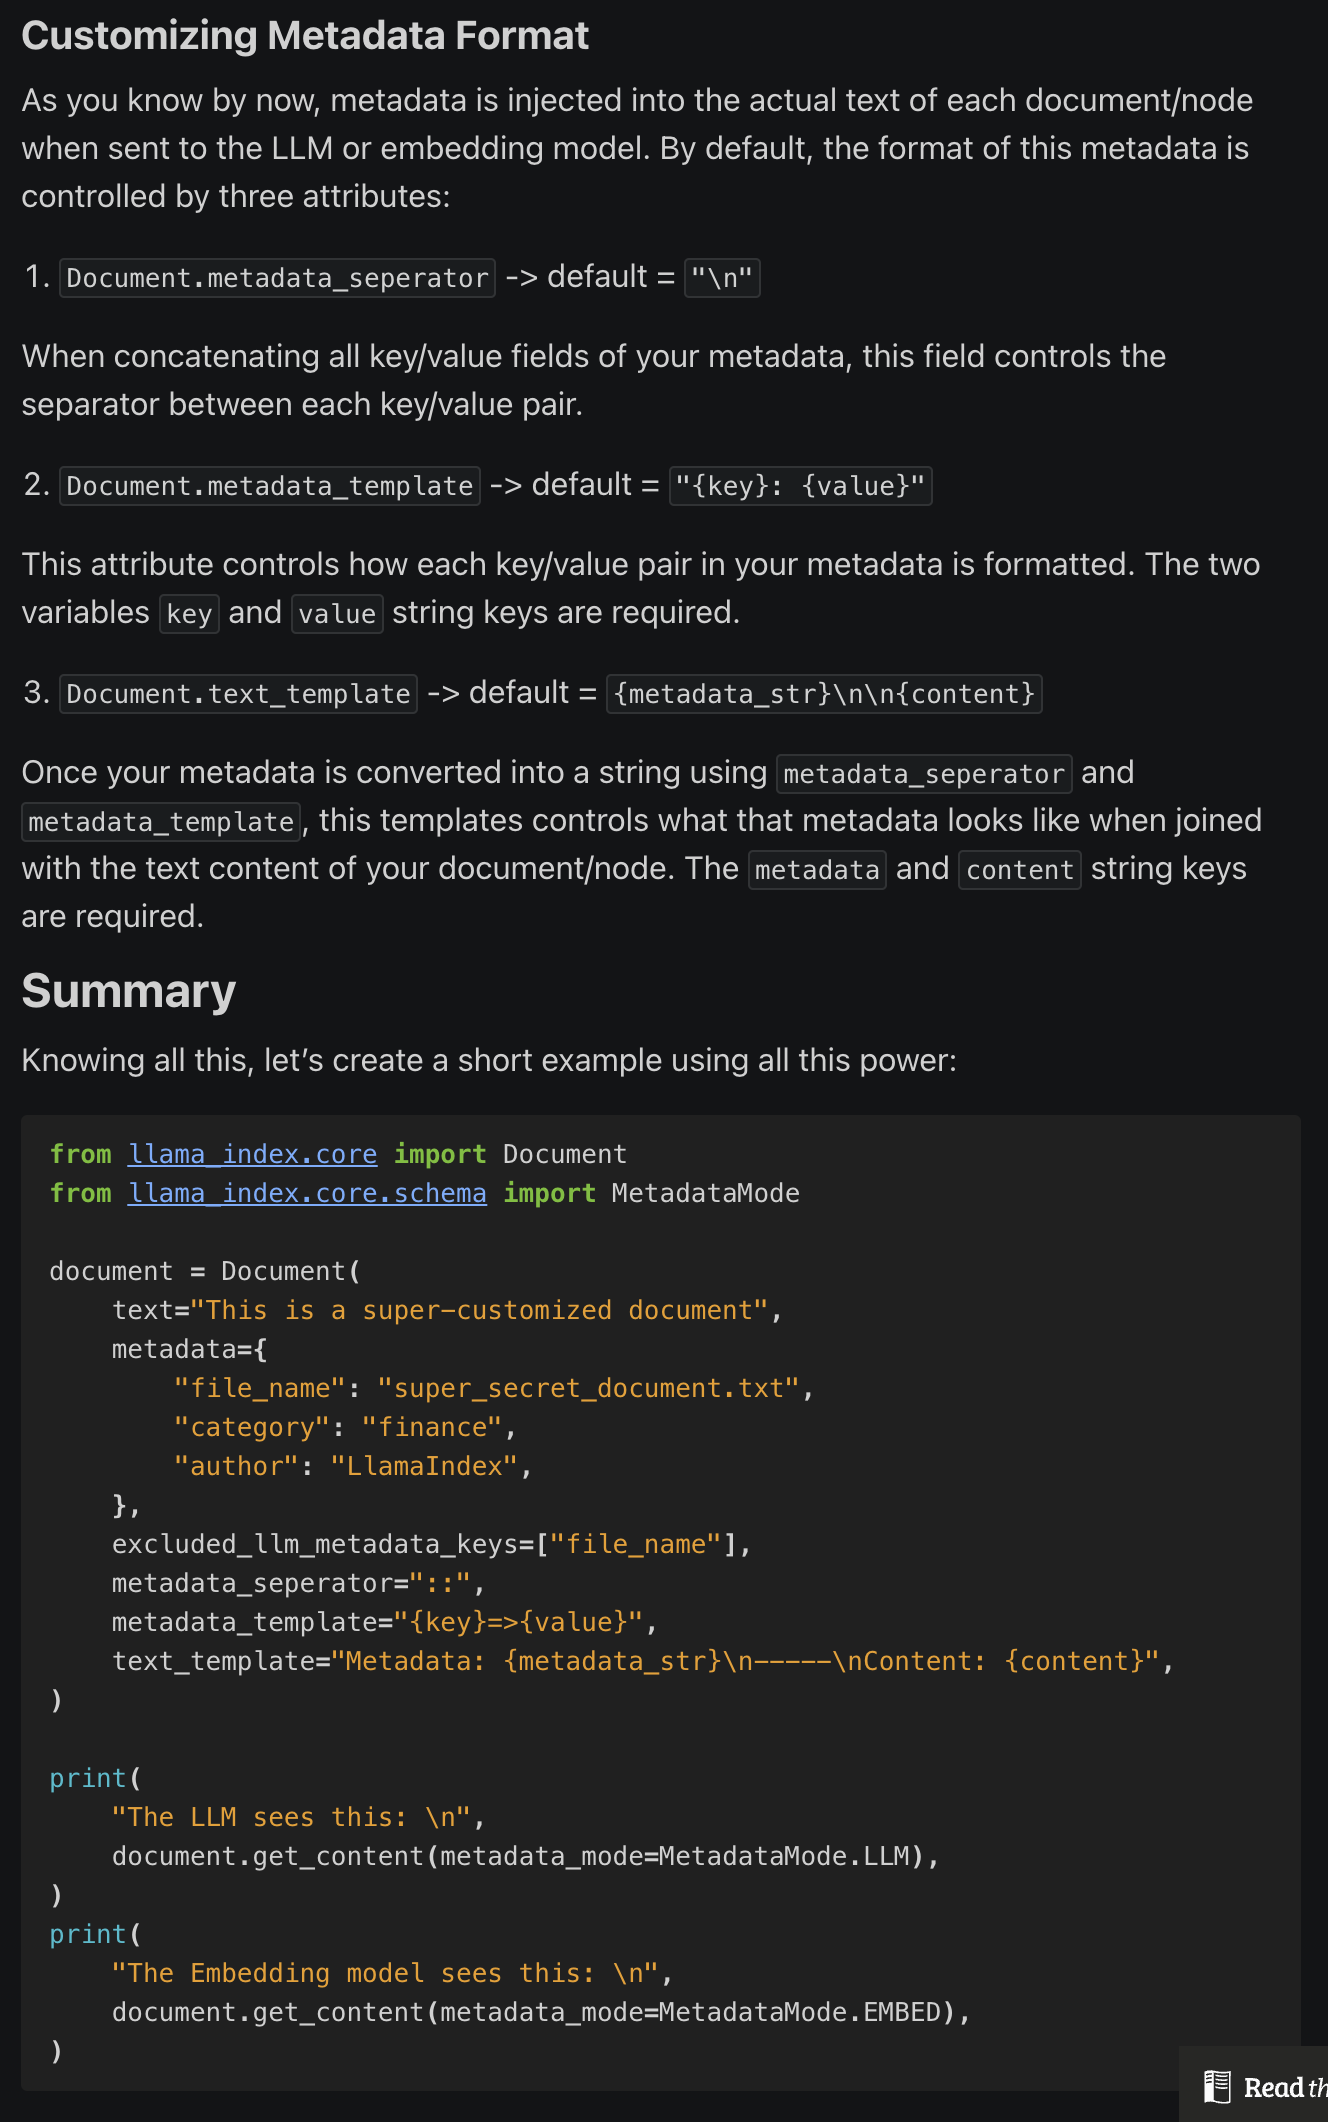

## Retriever

In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [ ]:
from llama_index.core import VectorStoreIndex, get_response_synthesizer , SimpleDirectoryReader
from llama_index.core.retrievers import VectorIndexRetriever
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.postprocessor import SimilarityPostprocessor

In [ ]:
dir_path = '/content/drive/MyDrive/Colab_Notebooks/GenerativeAI/LLamaIndex_Langchain/simpleApplication/data'
documents = SimpleDirectoryReader(dir_path).load_data()
index = VectorStoreIndex.from_documents(documents)

In [ ]:
retriever = VectorIndexRetriever(
    index = index,
    similarity_top_k = 10,
)

## Response Synthesizer

In [ ]:
response_synthesizer = get_response_synthesizer() # our query, our most-relevant data and our prompt are combined and sent to our LLM to return a response.

In [ ]:
query_engine = RetrieverQueryEngine(
    retriever=retriever,
    response_synthesizer=response_synthesizer,
    node_postprocessors=[SimilarityPostprocessor(
        similarity_cutoff=0.5 # threshold
    )]
)

In [ ]:
response = query_engine.query('what is yolo world')

from llama_index.core.response.pprint_utils import pprint_response
pprint_response(response = response,
                show_source=True)

Final Response: YOLO-World is a real-time open-vocabulary object
detector that enhances the YOLO series of detectors by incorporating
vision-language modeling and pre-training on large-scale datasets. It
introduces a new Re-parameterizable Vision-Language Path Aggregation
Network (RepVL-PAN) and region-text contrastive loss to enable
interaction between visual and linguistic information. YOLO-World
excels in detecting a wide range of objects in a zero-shot manner with
high efficiency, achieving notable performance on various tasks like
object detection and open-vocabulary instance segmentation.
______________________________________________________________________
Source Node 1/10
Node ID: b41a7dab-520f-4cd0-bd40-328f8d1dd834
Similarity: 0.7984905422952593
Text: Abstract  The You Only Look Once (YOLO) series of detectors have
established themselves as efficient and practical tools. However,
their reliance on predefined and trained object categories limits
their applicability in open sc

# Retriever

[Retriever](https://docs.llamaindex.ai/en/stable/module_guides/querying/retriever/root.html)

## Retriever Modules
[Retriever Modules](https://docs.llamaindex.ai/en/stable/module_guides/querying/retriever/retrievers.html)

# Querying an Index

[Querying an Index](https://docs.llamaindex.ai/en/stable/api_reference/query.html)




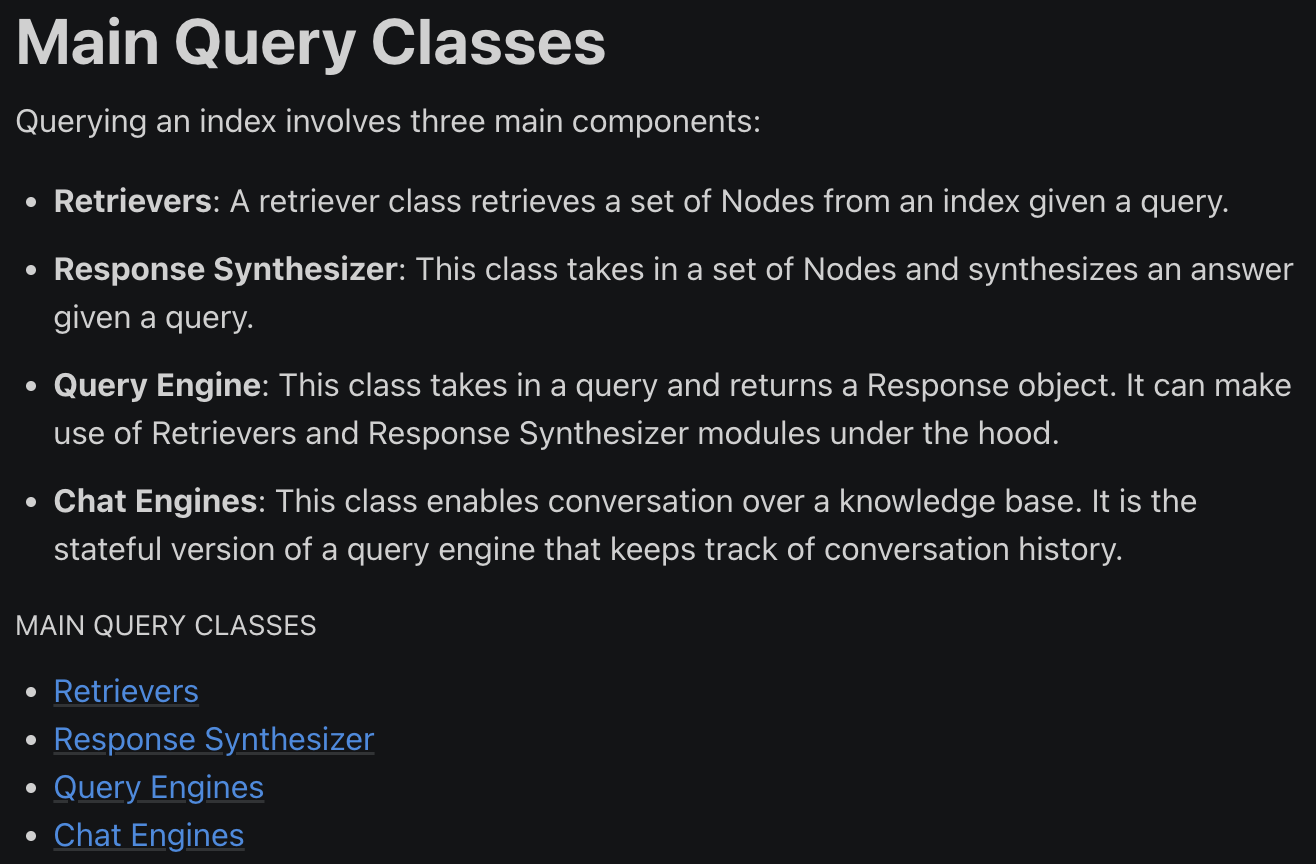

# Index Retrievers

[Index Retrievers](https://docs.llamaindex.ai/en/stable/api_reference/query/retrievers.html)

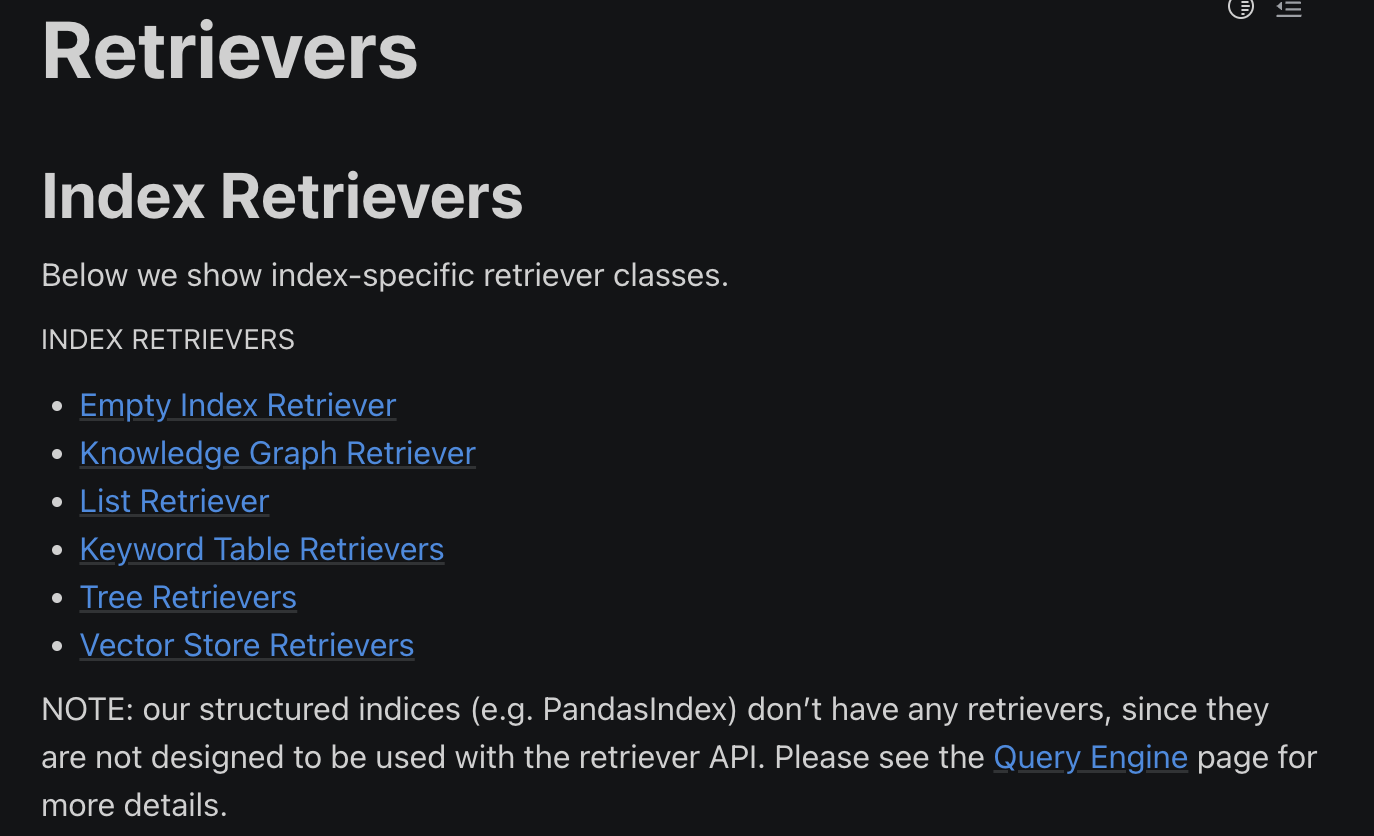

# Query Engines

[Query Engines](https://docs.llamaindex.ai/en/stable/api_reference/query/query_engines.html#query-engines)

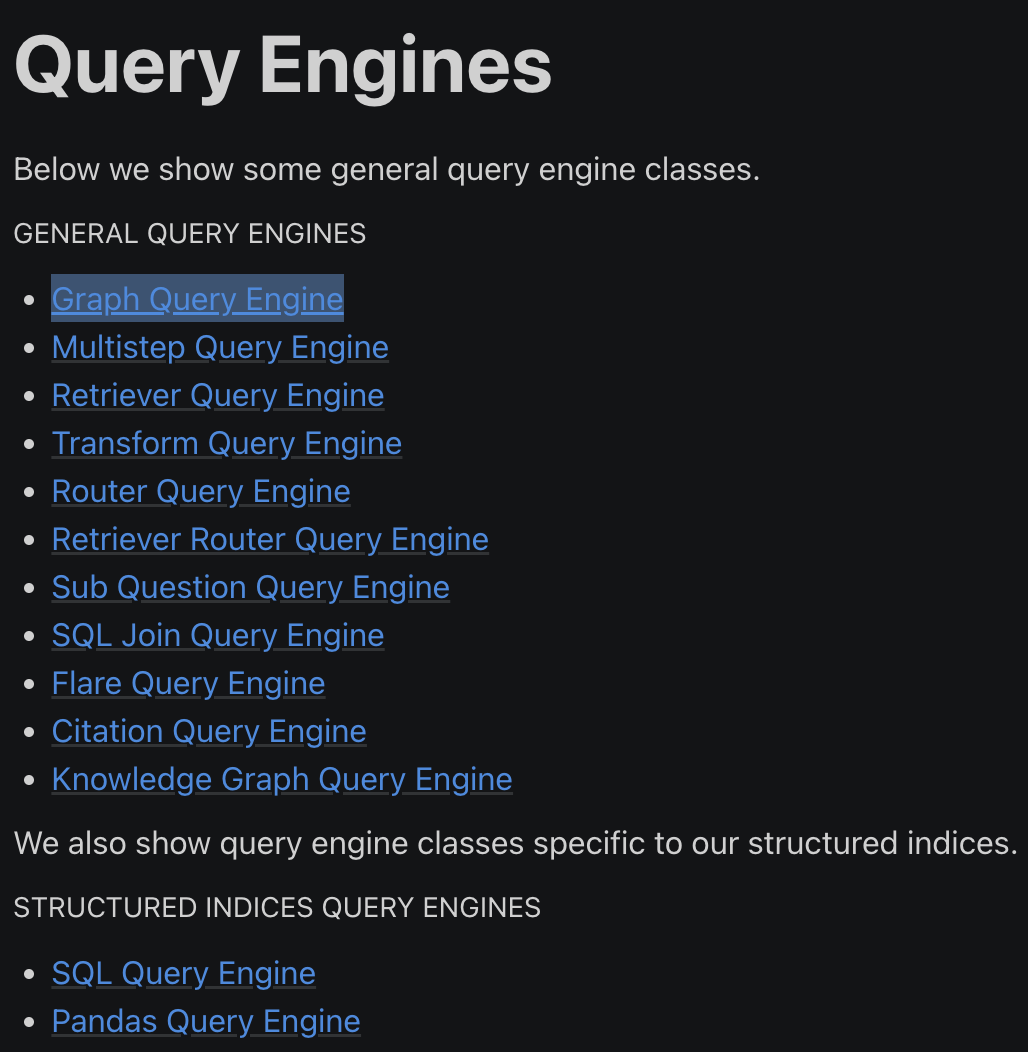

# Chat Engines

[Chat Engines](https://docs.llamaindex.ai/en/stable/api_reference/query/chat_engines.html)

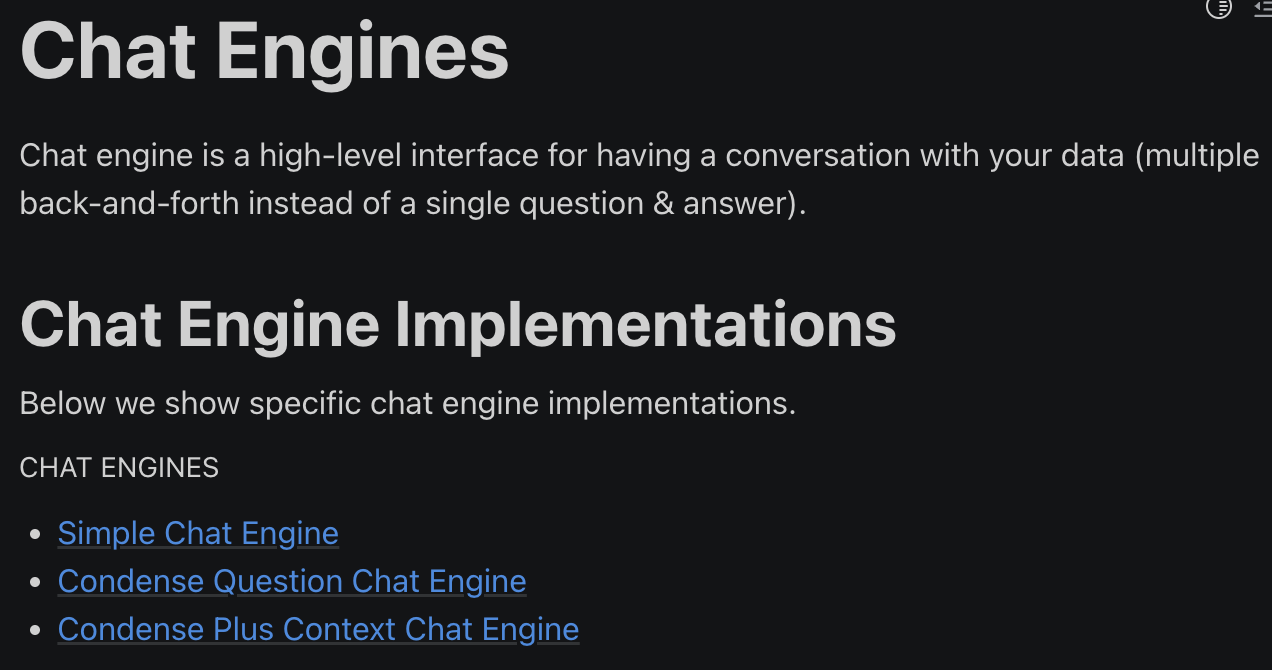